Changing mixing rate

In [ ]:
# Projections that mixing rate will slow 20-30%

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import pandas as pd
import statistics as st

In [29]:
#Reduction factor arr
red = np.array([1,0.80,0.75,0.70])

In [31]:
# coefficients
h = 1 # timestep size
t = np.arange(0,360,h) # time in day
N = np.size(t) # dimension of time step
nuto = .001 # initial condition for nutrient
phyo = .001 # initial condition for phyto
zooo = .001 # initial condition for zoo
deto = .001
photo = 0
# set parameters
Vmax = 0.851*(1.066)**(16.1+3) #er day
K = 0.1 # mmol/m3
Kp= 2.8 # mmol/m3
a = 0.4
g = 1.4 # per day
lp = 0.05 # per day
lz = 0.12 # per day
ld = 0.05
c = 0.01 * red # per day
Nth = 10 # mmol/m3
Wsink = 20
hml = 50

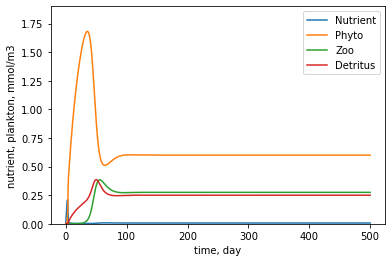

0.01


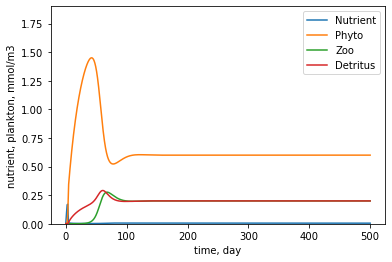

0.008


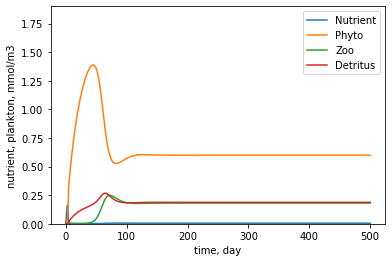

0.0075


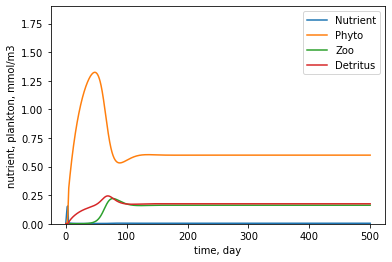

0.006999999999999999


In [32]:
count=0
nut_arr=np.zeros(np.size(c))
phy_arr=np.zeros(np.size(c))
zoo_arr=np.zeros(np.size(c))
det_arr=np.zeros(np.size(c))
photo_arr=np.zeros(np.size(c))
for i in c:
    def tendency(t,x,Vmax,K,Kp,a,g,lp,lz,ld,i,Nth,hml,Wsink):
        nut=x[0]
        phy=x[1]
        zoo=x[2]
        det=x[3]
        dnutdt = -Vmax*nut/(nut+K)*phy -i*(nut-Nth) + ld*det
        dphydt = Vmax*nut/(nut+K)*phy - zoo*g*phy/Kp - lp*phy
        dzoodt = a*zoo*g*phy/Kp -lz*zoo
        ddetdt = lp*phy+lz*zoo+(1-a)*g*phy*zoo/Kp -ld*det-Wsink/hml*det
        phtsyn = Vmax*nut/(nut+K)*phy
        out=np.array([dnutdt,dphydt,dzoodt,ddetdt,phtsyn])
        return out
    
    # define model_run function
    def model_run(trange,xinit,param,dt):
        # expand input
        Vmax = param[0]
        K = param[1]
        Kp= param[2]
        a = param[3]
        g = param[4]
        lp= param[5]
        lz= param[6]
        ld= param[7]
        i = param[8]
        Nth= param[9]
        hml= param[10]
        Wsink=param[11]
        sol = solve_ivp(tendency,trange,xinit,args=(Vmax,K,Kp,a,g,lp,lz,ld,i,Nth,hml,Wsink),method='RK45',max_step=dt)
        return sol
    
    # set time range
    trange = [0,500]
    # set parameters
    param=np.array([Vmax,K,Kp,a,g,lp,lz,ld,i,Nth,hml,Wsink])
    # set initial conditions
    xinit = np.array([nuto,phyo,zooo,deto,photo])
    # time step size
    h = 1
    out = model_run(trange,xinit,param,h)
    
    # plot the output
    t_out = out.t
    vec_out = out.y
    N_out = vec_out[0,:]
    P_out = vec_out[1,:]
    Z_out = vec_out[2,:]
    D_out = vec_out[3,:]
    Ph_out = vec_out[4,:]
    #
    plt.plot(t_out,N_out,label='Nutrient')
    plt.plot(t_out,P_out,label='Phyto')
    plt.plot(t_out,Z_out,label='Zoo')
    plt.plot(t_out,D_out,label='Detritus')
    plt.legend()
    plt.xlabel('time, day')
    plt.ylabel('nutrient, plankton, mmol/m3')
    plt.ylim(0, 1.9)
    plt.show()
    
    print(i)
    
    nut_arr[count]=np.mean(N_out[-10:])
    phy_arr[count]=np.mean(P_out[-10:])
    zoo_arr[count]=np.mean(Z_out[-10:])
    det_arr[count]=np.mean(D_out[-10:])
    photo_arr[count]=np.mean(Ph_out[-10:])
    
    count=count+1

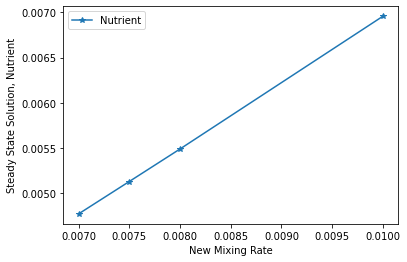

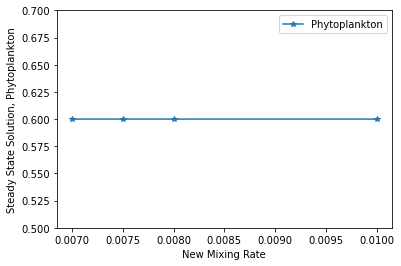

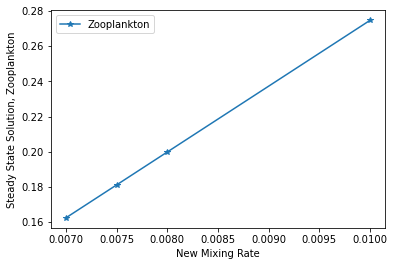

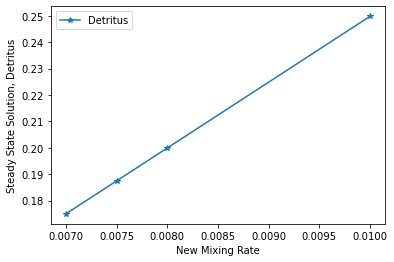

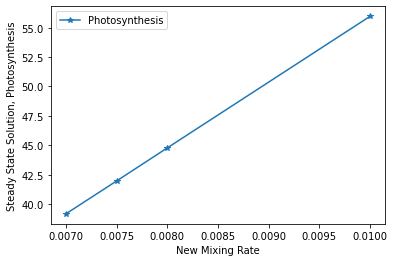

In [33]:
plt.plot(c,nut_arr, '*-', label='Nutrient')
plt.legend()
plt.xlabel('New Mixing Rate')
plt.ylabel('Steady State Solution, Nutrient')
plt.show()

plt.plot(c,phy_arr, '*-', label='Phytoplankton')
plt.legend()
plt.xlabel('New Mixing Rate')
plt.ylabel('Steady State Solution, Phytoplankton')
plt.ylim(0.5, 0.7)
plt.show()

plt.plot(c,zoo_arr, '*-', label='Zooplankton')
plt.legend()
plt.xlabel('New Mixing Rate')
plt.ylabel('Steady State Solution, Zooplankton')
plt.show()

plt.plot(c,det_arr, '*-', label='Detritus')
plt.legend()
plt.xlabel('New Mixing Rate')
plt.ylabel('Steady State Solution, Detritus')
plt.show()

plt.plot(c,photo_arr, '*-', label='Photosynthesis')
plt.legend()
plt.xlabel('New Mixing Rate')
plt.ylabel('Steady State Solution, Photosynthesis')
plt.show()
